### Student Details

Student Name: Ananya Krithika Thyagarajan

Student ID: 23187123


# Task 2: scikit learn

In [44]:
# import dependencies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#this line the plots to be embedded into the notebook
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12,6
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**1.	Read the iris dataset using Pandas (ref Option 2 above)**

**2.	Extract the Iris-setosa and Iris-verginica samples only**

**3.	Extract the petal length and petal width. These shall be our features.**

In [45]:

#1. read the iris data set using pandas
iris_df = pd.read_csv('C:/Users/Ananya/Documents/UL/Intro to Data Engineering/Data/iris_data.csv',header=0)
################################
# Your code here

#iris_df.head(10)

# correcting the column names so that there are no leading spaces which was present in the original one

iris_df.columns = ['sepal_length', 'sepa_width', 'petal_length', 'petal_width', 'class']
#iris_df.columns

#2. extracting the Iris-setosa and Iris-verginica samples
desired_data = iris_df.query("`class` == 'Iris-setosa' or `class` == 'Iris-virginica'")
desired_data.head()

#3. extracting the petal length and petal width
features = desired_data[['petal_length', 'petal_width']]
features.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


**4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours**

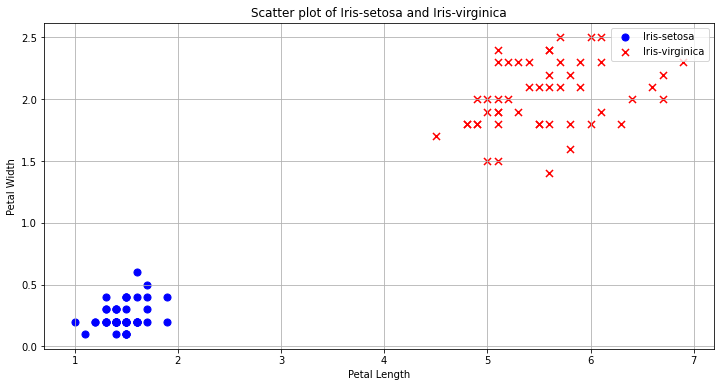

In [46]:
################################
# Your code here

setosa = desired_data[desired_data['class'] == 'Iris-setosa']
virginica = desired_data[desired_data['class'] == 'Iris-virginica']

plt.scatter(setosa['petal_length'], setosa['petal_width'], color='blue', label='Iris-setosa', marker='o', s=50)
plt.scatter(virginica['petal_length'], virginica['petal_width'], color='red', label='Iris-virginica', marker='x', s=50)

plt.title('Scatter plot of Iris-setosa and Iris-virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)
plt.show()


**5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?**

In [47]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 

################################
# Your code here


# Preparing the data
X = features.values
y = (desired_data['class'] == 'Iris-setosa').astype(int).values  # 1 for Iris-setosa, 0 for Iris-virginica


# Training the perceptron
percept = Perceptron(verbose=1)
percept.fit(X, y)

-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

**6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case**

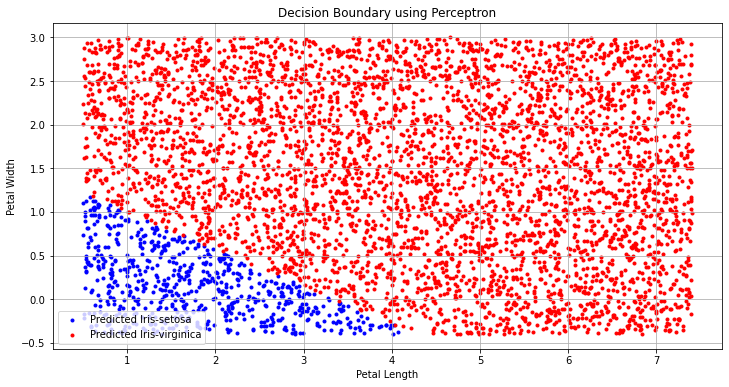

In [48]:
import random

################################
# Your code here

# Generating random input points
x_min, x_max = features['petal_length'].min() - 0.5, features['petal_length'].max() + 0.5
y_min, y_max = features['petal_width'].min() - 0.5, features['petal_width'].max() + 0.5

# Generating random input points
n_samples = 5000
ran_petal_len = np.random.uniform(x_min, x_max, n_samples)
ran_petal_wid = np.random.uniform(y_min, y_max, n_samples)

ran_points = np.column_stack((ran_petal_len, ran_petal_wid))
pred = percept.predict(ran_points)

# Plot the decision boundary using the random points
plt.scatter(ran_points[pred == 1][:, 0], ran_points[pred == 1][:, 1], color='blue', marker='.', label='Predicted Iris-setosa')
plt.scatter(ran_points[pred == 0][:, 0], ran_points[pred == 0][:, 1], color='red', marker='.', label='Predicted Iris-virginica')

plt.title('Decision Boundary using Perceptron')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)
plt.show()


# Task 3: Exploration

**"Commonality and differences between artificial neurons and biological neurons".**

The human brain has always been a source of fascination for the scientific community, since it is an intricate mosaic made up of billions of neurons. Artificial neurons have been created as a result of this biological marvel. At their core, both natural and artificial neurons work by taking in data, analysing it, and then generating an output. For instance, our biological neurons communicate information when we touch a hot surface, which causes the reflexive withdrawal of our hand. Likewise, artificial neurons in a machine learning model might analyse pixels from a picture to determine which items are present in it. While artificial neurons rely on mathematical operations to accomplish a similar result, biological neurons transmit information using electrochemical processes. 

It's vital to remember that artificial neurons are a streamlined version of their organic counterparts, despite these similarities. The complicated synaptic connections, neurotransmitter release, and electrical signal propagation are only a few examples of the activities that contribute to biological neurons' complexity. On the other hand, a standard component of neural networks, which consists of an artificial neuron, is often built using inputs, weights, a summation function, and an activation function. Artificial neurons, for instance, weigh several aspects, such as the space between eyes or the curve of the nose, in a facial recognition system to identify a face. The activation function is a mathematical description of the thresholding action unique to biological neurons, whereas weights in artificial neurons mimic the synaptic strengths in biological ones. 

Therefore, the crucial question still stands: Can artificial neurons accurately mimic biological ones? The answer has several aspects. Functionally, synthetic neurons successfully mimic the simple input-output structure of real neurons. They have been taught to identify patterns like those found in Google's image search or even to generate text like the suggestions on messaging apps. Layers of these synthetic neurons were used to create neural networks, which have revolutionised industries like banking and medicine. However, artificial neurons provide a crude approximation when viewed from a biological perspective. Standard artificial neuron models are still unable to simulate subtle aspects of biological brain functioning, such as the synchronisation of neuronal firing during memory formation. 

In conclusion, while artificial and real neurons share a thematic resemblance, a deeper investigation reveals important differences. Even though artificial neurons are an example of human invention in our effort to comprehend and replicate complex systems, biological neurons display the complicated dance of evolution and biology. Artificial neurons and the networks they generate have made ground-breaking contributions to modern science and technology, even though they may not fully capture the spirit of their biological counterparts.



References:

1. Russell, S. J., & Norvig, P. (2009). Artificial intelligence: A modern approach. Prentice Hall.
2. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
3. Koch, C. (1999). Biophysics of computation: Information processing in single neurons. Oxford university press.